In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


# ANS 1

In [86]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  

In [87]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [88]:
df=pd.DataFrame(X)

In [89]:
df['target']=y


In [91]:
df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [11]:
df.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
target                          0
dtype: int64

In [39]:
df.duplicated().sum()


0

In [56]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler=Normalizer()


In [93]:
scaler.fit(df[['Alcohol','Malicacid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','0D280_0D315_of_diluted_wines','Proline']])

Normalizer()

In [94]:
df=pd.DataFrame(scaler.transform(df[['Alcohol','Malicacid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','0D280_0D315_of_diluted_wines','Proline']]),columns=['Alcohol','Malicacid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','0D280_0D315_of_diluted_wines','Proline'])

In [95]:
df['target']=y

In [96]:
X=scaler.fit_transform(X)

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
from sklearn.decomposition import PCA

In [101]:
parameter={'n_components':[1,2,3,4,5,6,7,8,9]}

In [102]:
clf=GridSearchCV(PCA(),param_grid=parameter)

In [103]:
clf.fit(X_train,y_train)

GridSearchCV(estimator=PCA(),
             param_grid={'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [104]:
clf.best_params_

{'n_components': 7}

In [105]:
pca=PCA(n_components=7)

In [106]:
pca

PCA(n_components=7)

In [108]:
X_train=pca.fit_transform(X_train)

In [109]:
X_test=pca.transform(X_test)

In [110]:
X_train

array([[-5.89710889e-02,  1.54231451e-03, -2.60803070e-03,
         1.06433296e-03,  1.05377519e-04, -1.12074866e-04,
         2.02202118e-04],
       [ 4.08826534e-02, -9.80384832e-03,  6.27621737e-03,
         3.99997258e-03, -5.86984411e-03, -1.25892360e-03,
         3.26775796e-03],
       [ 4.31064946e-02,  3.74055279e-03, -2.53919344e-03,
         4.19611080e-03, -1.23075768e-03, -1.43884364e-03,
        -2.81338540e-03],
       [ 4.89365319e-02,  2.33220927e-02, -2.23832992e-03,
        -3.93089638e-03, -1.35535753e-03, -4.75740447e-05,
         7.98196945e-05],
       [-2.57322107e-02, -4.37029938e-03,  8.24912581e-03,
         9.72256140e-04,  1.31894989e-03,  7.10327877e-06,
        -7.47630994e-04],
       [-8.22462828e-02, -1.16803875e-03, -1.85012429e-03,
         9.82164023e-04,  1.52815927e-03, -8.21814667e-04,
         1.88464947e-03],
       [-8.24286869e-02,  3.85808169e-04, -1.69528640e-03,
         1.93260834e-03,  1.26714835e-03, -4.76352666e-04,
         1.6952496

In [111]:
X_test

array([[-2.04214618e-02,  8.97996136e-03, -2.86554484e-04,
         1.39010801e-03, -1.31219319e-03,  1.27119165e-03,
        -1.17749307e-03],
       [-5.36615172e-02,  1.37704441e-03, -9.03238956e-04,
         4.69199500e-04, -5.29753637e-04,  1.13890473e-03,
         8.85771715e-04],
       [ 5.64311873e-03, -2.23051115e-03,  1.54290377e-03,
        -1.41274911e-03, -2.11774742e-03, -1.49380650e-03,
         4.67119095e-04],
       [-7.70363962e-02, -3.97411313e-03, -2.09020247e-03,
        -4.61466547e-04,  2.40013248e-03,  1.87634049e-04,
         1.22677525e-03],
       [ 2.52917176e-04, -7.90027233e-03, -2.75700070e-04,
         1.67683936e-03,  8.29318453e-04, -1.83733275e-03,
        -2.93909203e-03],
       [-6.30012361e-02,  1.54784660e-03, -1.16507086e-03,
        -5.66450191e-04,  1.26660660e-03,  2.74888947e-04,
         5.80680850e-04],
       [-1.23385596e-04, -2.28466852e-03, -4.11089328e-03,
        -9.68543694e-05, -4.21896283e-03,  7.83109406e-04,
         5.8955045

In [112]:
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [115]:
df1=pd.DataFrame(data=X_train,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

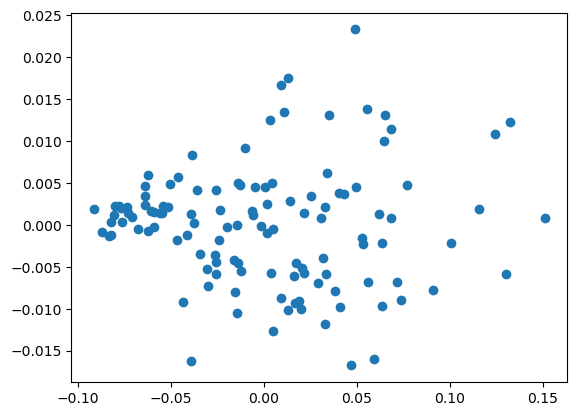

In [120]:
plt.scatter(data=df,x='PC1',y='PC2')

In [124]:
from sklearn.cluster import KMeans

In [125]:
kmeans=KMeans(n_clusters=4,random_state=32)

In [126]:
kmeans.fit(X)

KMeans(n_clusters=4, random_state=32)

In [127]:
cluster_labels=kmeans.labels_
centroids=kmeans.cluster_centers_

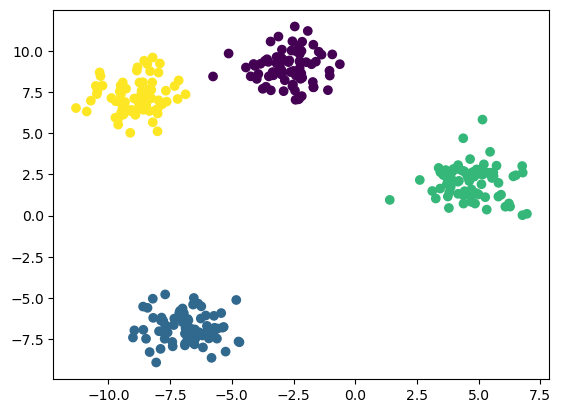

In [150]:
 plt.scatter(X[:,0], X[:,1],c=cluster_labels)

### k means cluster scatter are showing the similar points 
### pca scatter are showing the distribution of points  

In [152]:
cluster_labels

array([3, 3, 0, 1, 3, 1, 2, 1, 0, 2, 0, 2, 0, 0, 3, 0, 3, 2, 0, 0, 2, 0,
       1, 3, 0, 3, 3, 1, 1, 2, 0, 2, 3, 2, 3, 0, 3, 1, 3, 1, 2, 0, 3, 1,
       0, 0, 3, 2, 3, 2, 1, 3, 1, 0, 1, 2, 3, 2, 2, 0, 3, 2, 2, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 0, 1, 0, 0, 3, 0, 1, 3, 3, 2,
       2, 2, 3, 0, 3, 0, 0, 3, 1, 0, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 1, 3,
       2, 0, 0, 0, 0, 2, 3, 1, 3, 1, 1, 1, 0, 3, 1, 3, 3, 0, 3, 1, 2, 0,
       0, 0, 0, 2, 2, 3, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0, 3, 2, 1,
       0, 2, 1, 3, 3, 2, 0, 3, 1, 3, 2, 3, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1,
       1, 2, 2, 1, 3, 0, 3, 2, 2, 3, 1, 0, 2, 2, 1, 1, 1, 3, 2, 1, 1, 2,
       2, 3, 0, 0, 1, 2, 0, 1, 1, 3, 1, 0, 0, 1, 1, 2, 3, 1, 3, 3, 0, 3,
       3, 1, 3, 1, 2, 2, 3, 3, 2, 2, 2, 3, 0, 1, 2, 1, 3, 2, 3, 3, 3, 1,
       1, 2, 3, 1, 1, 1, 3, 1, 3, 1, 3, 2, 1, 3, 2, 0, 3, 0, 2, 0, 3, 0,
       1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 3, 3, 1, 0, 0, 2, 2, 2, 2, 1, 3, 2,
       1, 2, 2, 1, 0, 1, 2, 0, 3, 0, 2, 0, 3, 3])

In [153]:
centroids

array([[-2.70981136,  8.97143336],
       [-6.83235205, -6.83045748],
       [ 4.7182049 ,  2.04179676],
       [-8.87357218,  7.17458342]])